In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('NODES2-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')

In [3]:
df

,timestamp,node_stack_messages_processed_per_sec,node_stack_messages_processed_count_per_sec,min_node_stack_messages_processed,lo_node_stack_messages_processed,avg_node_stack_messages_processed,hi_node_stack_messages_processed,max_node_stack_messages_processed,client_stack_messages_processed_per_sec,client_stack_messages_processed_count_per_sec,...,max_storage_pool_manager_tables_size,max_storage_bls_bft_readers,max_storage_bls_bft_tables_num,max_storage_bls_bft_tables_size,max_storage_seq_no_readers,max_storage_seq_no_tables_num,max_storage_seq_no_tables_size,max_storage_metrics_readers,max_storage_metrics_tables_num,max_storage_metrics_tables_size
0,2024-06-25 19:18:00,0.550000,47.333333,0,0.011084,0.011620,0.195561,4.0,0.000000,47.333333,...,0,0,0,720.0,0.0,0,720.0,0,0,28792.0
1,2024-06-25 19:19:00,4.850000,95.966667,0,0.049334,0.050538,0.811964,32.0,3.116667,95.966667,...,0,0,0,720.0,0.0,0,720.0,0,0,139144.0
2,2024-06-25 19:20:00,350.383333,27.750000,0,11.512722,12.626426,78.106910,755.0,116.066667,27.750000,...,0,0,0,17664.0,0.0,0,1029760.0,0,0,269432.0
3,2024-06-25 19:21:00,416.450000,22.866667,0,16.585362,18.212099,90.811755,831.0,138.016667,22.866667,...,0,0,0,28544.0,0.0,0,2959864.0,0,0,398480.0
4,2024-06-25 19:22:00,461.333333,24.483333,0,17.054243,18.842750,95.835788,830.0,152.833333,24.483333,...,0,0,0,41080.0,0.0,0,5489816.0,0,0,553528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-06-25 20:31:00,0.000000,94.350000,0,0.000000,0.000000,0.000000,0.0,0.000000,94.350000,...,0,0,0,613024.0,398072.0,0,55160264.0,0,0,9883336.0
74,2024-06-25 20:32:00,0.000000,94.333333,0,0.000000,0.000000,0.000000,0.0,0.000000,94.333333,...,0,0,0,613024.0,398072.0,0,55160264.0,0,0,9993880.0
75,2024-06-25 20:33:00,0.000000,94.366667,0,0.000000,0.000000,0.000000,0.0,0.000000,94.366667,...,0,0,0,613024.0,398072.0,0,55160264.0,0,0,10104632.0
76,2024-06-25 20:34:00,0.100000,94.383333,0,0.001037,0.001060,0.043050,2.0,0.000000,94.383333,...,0,0,0,614104.0,398072.0,0,55160264.0,0,0,10218384.0


In [4]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'avg_monitor_avg_latency', 'avg_backup_monitor_avg_latency']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'avg_monitor_avg_latency', 'variable'] = 'Avg. Monitor Avg. Latency'
melted_df.loc[melted_df['variable'] == 'avg_backup_monitor_avg_latency', 'variable'] = 'Avg. Backup Monitor Avg. Latency'

In [5]:
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Avg. Monitor Avg. Latency,0.000000
1,2024-06-25 19:19:00,Avg. Monitor Avg. Latency,1.671115
2,2024-06-25 19:20:00,Avg. Monitor Avg. Latency,7.065080
3,2024-06-25 19:21:00,Avg. Monitor Avg. Latency,9.209032
4,2024-06-25 19:22:00,Avg. Monitor Avg. Latency,9.779108
...,...,...,...
151,2024-06-25 20:31:00,Avg. Backup Monitor Avg. Latency,0.000000
152,2024-06-25 20:32:00,Avg. Backup Monitor Avg. Latency,0.000000
153,2024-06-25 20:33:00,Avg. Backup Monitor Avg. Latency,0.000000
154,2024-06-25 20:34:00,Avg. Backup Monitor Avg. Latency,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_62407/1767346363.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


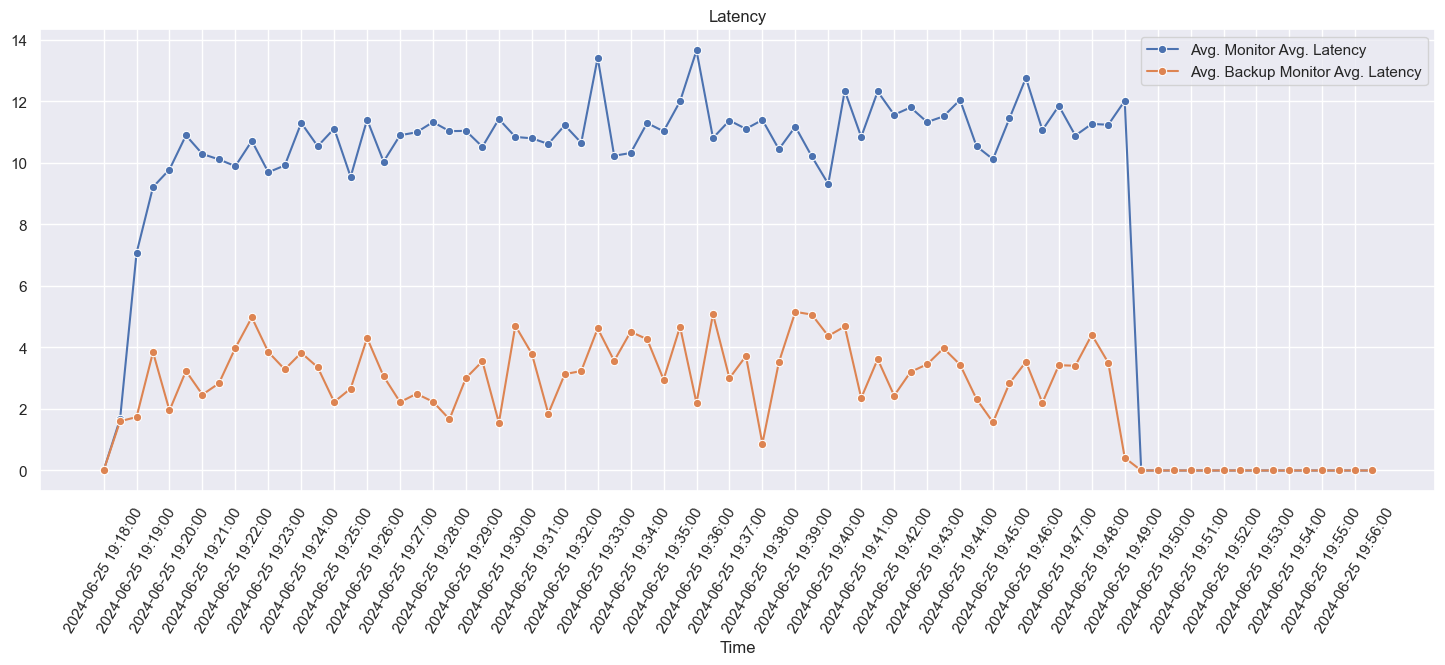

In [6]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

In [7]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'client_stack_messages_processed_per_sec', 'ordered_batch_size_per_sec']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'client_stack_messages_processed_per_sec', 'variable'] = 'Client stack messages processed per sec'
melted_df.loc[melted_df['variable'] == 'ordered_batch_size_per_sec', 'variable'] = 'Ordered batch size per sec'
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Client stack messages processed per sec,0.000000
1,2024-06-25 19:19:00,Client stack messages processed per sec,3.116667
2,2024-06-25 19:20:00,Client stack messages processed per sec,116.066667
3,2024-06-25 19:21:00,Client stack messages processed per sec,138.016667
4,2024-06-25 19:22:00,Client stack messages processed per sec,152.833333
...,...,...,...
151,2024-06-25 20:31:00,Ordered batch size per sec,0.000000
152,2024-06-25 20:32:00,Ordered batch size per sec,0.000000
153,2024-06-25 20:33:00,Ordered batch size per sec,0.000000
154,2024-06-25 20:34:00,Ordered batch size per sec,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_62407/1886614044.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


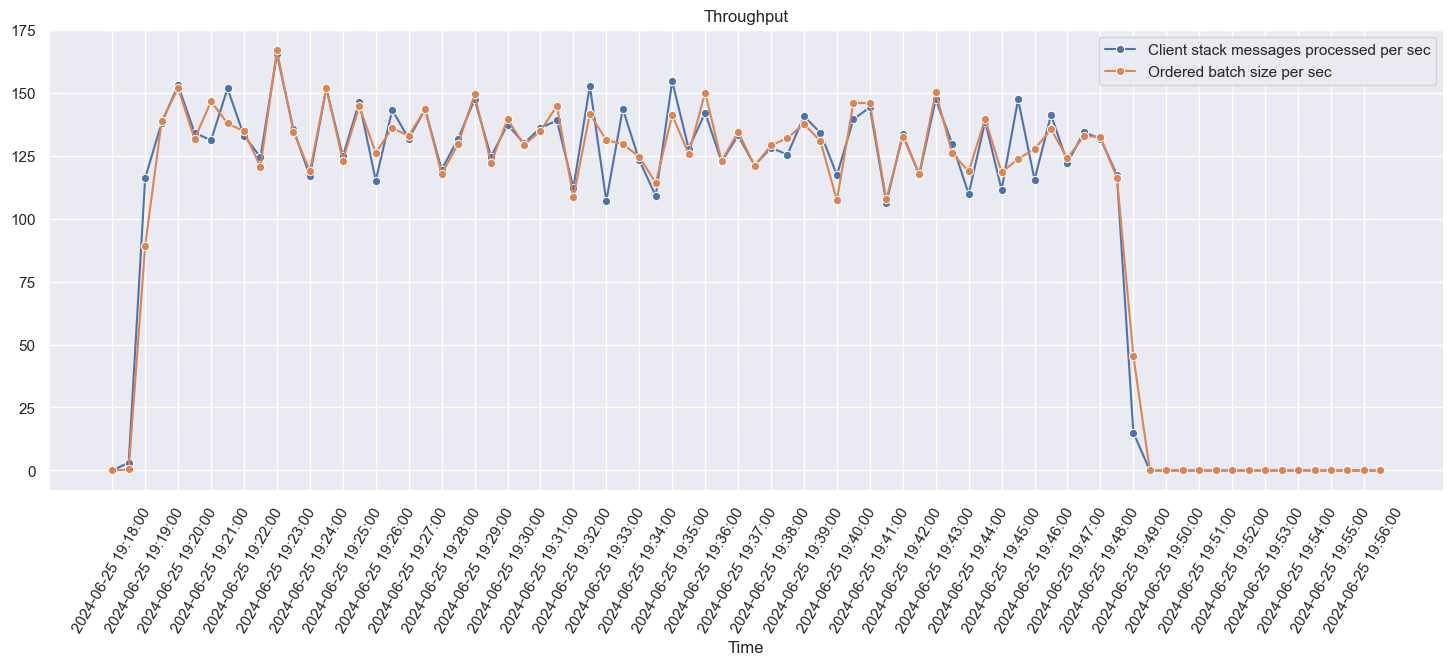

In [8]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')